In [1]:
%load_ext autoreload
%autoreload 2

import random
import pandas as pd
from exploration.import_graph import AcademicGraph
from exploration.graph_features import process_features, SpectralClustering
from exploration.network_models import *

import matplotlib.pyplot as plt

import numpy as np
import networkx as nx

In [2]:
G = AcademicGraph()

domains, graphs, domain_statistics = G.segmented_graphs()

data = {}
features = domain_statistics[0].keys()
for f in features:
    data[f] = [domain_statistics[i][f] for i in range(len(domains))]

df_domain_statistics = pd.DataFrame(data, index=domains)
df_domain_statistics

Preparing domain: Academia
Preparing domain: Applied Sciences
Preparing domain: Education
Preparing domain: Engineering
Preparing domain: Humanities
Preparing domain: Mathematics and Computing
Preparing domain: Medicine and Health
Preparing domain: Natural Sciences
Preparing domain: Social Sciences


,Total,Men,Women
Academia,274474.0,152042.0,81846.0
Applied Sciences,27335.0,16226.0,6173.0
Education,13580.0,5054.0,6885.0
Engineering,28811.0,19331.0,3564.0
Humanities,41096.0,21754.0,15456.0
Mathematics and Computing,25412.0,16620.0,3579.0
Medicine and Health,51103.0,21232.0,21459.0
Natural Sciences,69014.0,43466.0,15659.0
Social Sciences,37554.0,20547.0,12735.0


In [3]:
graph_features = {}
nx_graphs = {}
for domain, g in zip(domains, graphs):
    nx_graphs[domain] = nx.Graph(g)
    graph_features[domain] = process_features(nx_graphs[domain])

In [4]:
data = {}
features = graph_features["Academia"].keys()
for f in features:
    data[f] = [graph_features[domain][f] for domain in domains]

df_graph_features = pd.DataFrame(data, index=domains)
df_graph_features

,num_nodes,num_edges,weighted_num_edges,density,average_degree,weighted_average_degree,clustering_coefficient,weighted_clustering_coefficient,average_shortest_path,diameter,algebraic_connectivity,weighted_algebraic_connectivity
Academia,359,27170,133348.0,0.422807,151.364903,742.885794,0.756086,0.003592,1.586032,3,5.848935,5.848935
Applied Sciences,192,7216,17784.0,0.393543,75.166667,185.250000,0.623124,0.015677,1.617147,3,5.983820,5.983820
Education,196,5056,10121.0,0.264574,51.591837,103.275510,0.498485,0.014182,1.764260,3,5.940069,5.940069
Engineering,195,7295,18544.0,0.385673,74.820513,190.194872,0.633120,0.005702,1.626064,3,4.933195,4.933195
Humanities,217,9215,26053.0,0.393198,84.930876,240.119816,0.680055,0.022344,1.619858,3,5.772511,5.772511
Mathematics and Computing,210,7600,16163.0,0.346320,72.380952,153.933333,0.579623,0.013113,1.665482,3,7.906446,7.906446
Medicine and Health,261,11229,31884.0,0.330946,86.045977,244.321839,0.600649,0.004522,1.680754,3,3.995227,3.995227
Natural Sciences,277,14451,37921.0,0.378041,104.339350,273.797834,0.674083,0.009856,1.630827,3,5.876688,5.876688
Social Sciences,235,10643,26077.0,0.387089,90.578723,221.931915,0.637624,0.016554,1.626514,3,5.004928,5.004928


### Plotting
Interested in:
1. How the different **domains** differ from one another. I'm thinking clustering coefficent, density,
2. **Institutions** within a specific domain: degree distribution, node centrality, node betweeness

In [5]:
def plot_domains(idx: int, feat_name: str) -> None:
    temp = df_graph_features.drop("Academia")
    axs[idx].plot(temp.index, temp[feat_name])
    axs[idx].set_title(feat_name)


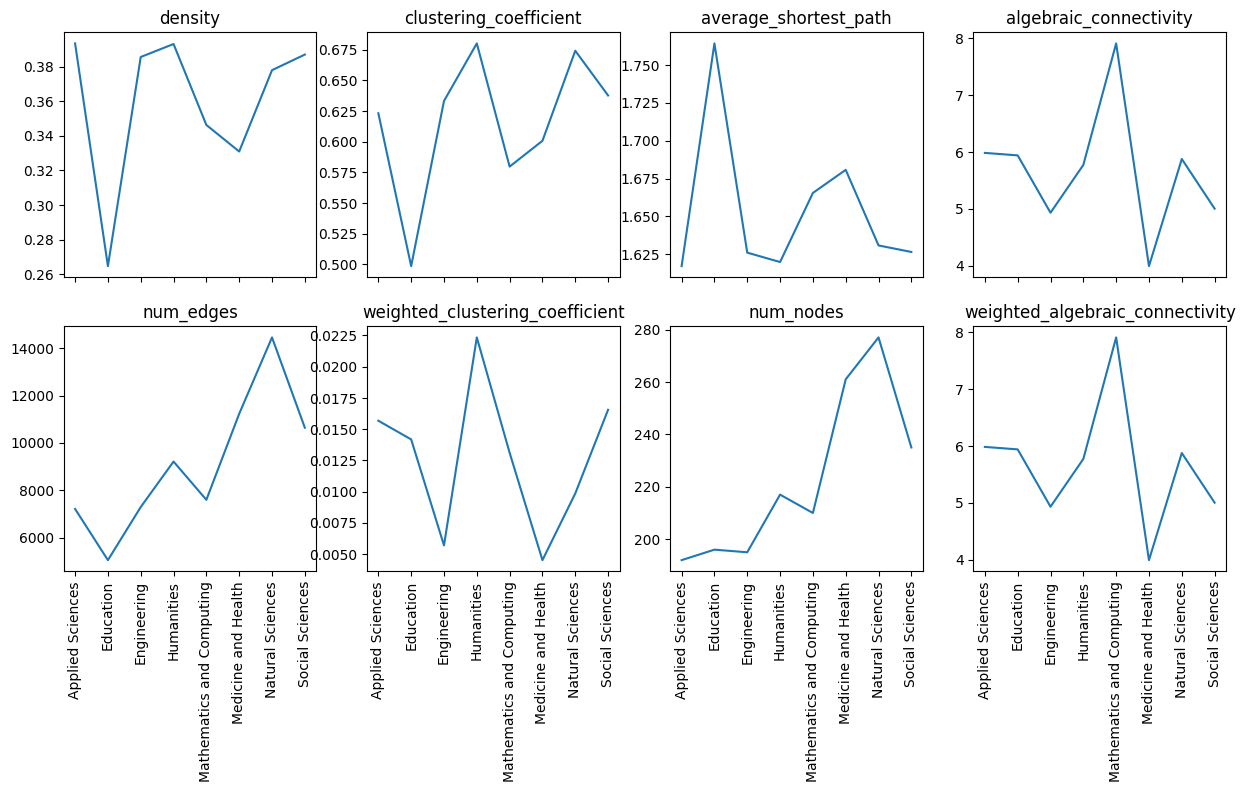

In [6]:
fig, axs = plt.subplots(2,4, figsize = (15,7), sharex = True)
feats = ["density","clustering_coefficient", "average_shortest_path","algebraic_connectivity","num_edges","weighted_clustering_coefficient","num_nodes","weighted_algebraic_connectivity"]

axs = axs.flatten()

for i, feat in enumerate(feats):
    plot_domains(i, feat)
    if i >= 4:
        axs[i].tick_params(axis="x",rotation=90)


##

In [7]:
def plot_graph(G, pos, node_clusters=None):
  plt.figure(figsize=(5, 5))
  nx.draw(G, pos=pos, node_size=10,
          node_color=[plt.cm.Set1(c) for c in node_clusters]
                      if node_clusters is not None else "gray")
  plt.show()

In [8]:
def plot_individual_domain(G, name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")
    plt.suptitle(name)
    fig.tight_layout()
    plt.show()

In [9]:
academic_graph = nx_graphs["Academia"]

In [10]:
spec_cluster = SpectralClustering(n_classes = 15, normalize="sym")
academic_labels = spec_cluster.fit_predict(academic_graph)

node_list = list(academic_graph.nodes())

node_names_labels = dict(zip(node_list, academic_labels))
cluster_df = G.df_edges.merge(pd.DataFrame.from_dict(dict(node_names_labels), orient="index", columns=["cluster"]).reset_index().rename({"index":"InstitutionId"},axis=1))

U.shape (359, 359)


/home/tim/miniconda3/envs/pytorch/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
cluster_df.groupby(["InstitutionName", "cluster"])["weight"].sum().sort_values(ascending=False).reset_index().groupby("cluster").head(6).sort_values(by = "cluster").head(50)

,InstitutionName,cluster,weight
4,University of Minnesota Twin Cities,0,9276.0
5,Arizona State,0,9067.0
28,University of Arizona,0,6588.0
9,University of Illinois Urbana-Champaign,0,8194.0
18,University of Wisconsin-Madison,0,7165.0
14,UT Austin,0,7488.0
80,University of Alabama at Birmingham,1,4275.0
175,Medical University of South Carolina,1,1901.0
132,Tulane,1,2710.0
81,Case Western Reserve,1,4186.0


### Comparison With Network Models






In [12]:
G_academic = nx.Graph(graphs[0])
G_statistics = original_graph_statistics(G_academic)
ER_statistics = ER_graph_statistics(G_academic)
WS_statistics = WS_graph_statistics(G_academic)
BA_statistics = BA_graph_statistics(G_academic)

network_models = ["original", "ER", "WS", "BA"]
statistics = [G_statistics, ER_statistics, WS_statistics, BA_statistics]

data = {}
features = statistics[0].keys()
for f in features:
    data[f] = [statistics[i][f] for i in range(len(network_models))]

df_network_model_statistics = pd.DataFrame(data, index=network_models)
df_network_model_statistics


,num_nodes,num_edges,average_degree,average_shortest_path,clustering_coefficient
original,359,27170.0,151.364903,1.586032,0.756086
ER,359,27170.0,151.364903,1.172048,0.421629
WS,359,26925.0,150.000000,1.743017,0.744966
BA,359,27284.0,152.000000,3.319931,0.096416


### Prestige Variance Among Neighboring Institutions

In [13]:
G_academic = graphs[0]
real_prestiges = nx.get_node_attributes(G_academic, "PrestigeRank")

# randomly shuffle prestiges
all_prestiges = list(real_prestiges.values())
random.shuffle(all_prestiges)
random_prestiges = {node:prestige for node, prestige in zip(list(G_academic.nodes()), all_prestiges)}

In [14]:
def calculate_prestige_variance(prestige, G):
    count = {node:0 for node in G.nodes()}
    variance_sum = {node:0 for node in G.nodes()}
    for u, v, data in G.edges(data=True):
        variance_sum[u] += data["weight"] * (prestige[u] - prestige[v])**2
        count[u] += data["weight"]
    
    variances = [variance_sum[node] / count[node] for node in G.nodes()]

    return variances

In [15]:
real_variances = calculate_prestige_variance(real_prestiges, G_academic)
random_variances = calculate_prestige_variance(random_prestiges, G_academic)

print("Average real prestige variance:", np.array(real_variances).mean())
print("Average random prestige variance:", np.array(random_variances).mean())

Average real prestige variance: 0.03563999888132271
Average random prestige variance: 0.05266407659766998


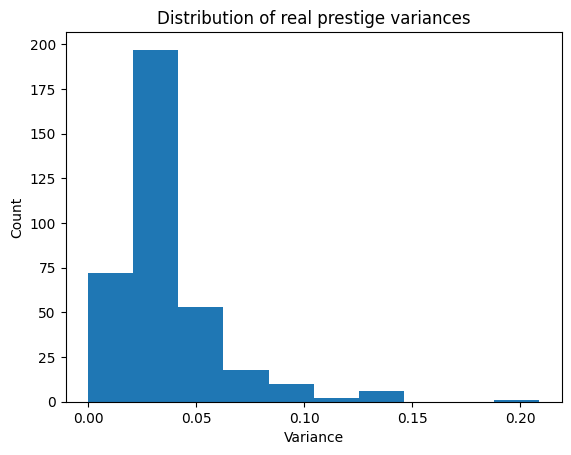

In [16]:
plt.hist(real_variances)
plt.title("Distribution of real prestige variances")
plt.xlabel("Variance")
plt.ylabel("Count")
plt.show()

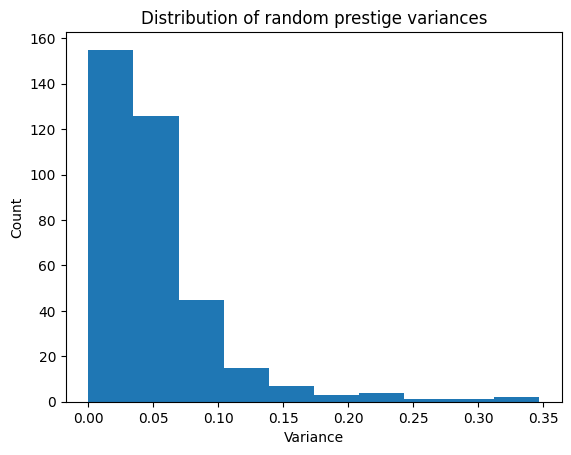

In [17]:
plt.hist(random_variances)
plt.title("Distribution of random prestige variances")
plt.xlabel("Variance")
plt.ylabel("Count")
plt.show()